In [2]:
# read txt file 
answers = []
submitted_answers = []
for line in open('../data/answers.txt'):
    answers.append(line.strip())
for line in open('../data/submitted_answers.txt'):
    submitted_answers.append(line.strip())

In [3]:
accuracy = 0
for i in range(len(answers)):
    if answers[i] == submitted_answers[i]:
        accuracy += 1
print('Accuracy: {:.1f}%'.format(accuracy/len(answers)*100))

Accuracy: 80.0%


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# List of class directories
class_directories = ['expA', 'expB', 'expC', 'expD', 'expE']
nb_classes = len(class_directories)
confusion_matrix = np.zeros((nb_classes, nb_classes))

# MCQ classes
# (B,A,D,E,C)
# (B,C,A,E,D)
# (A,C,B,E,D)
# (C,A,E,D,B)
# (C,A,D,E,B)
# (A,B,C,E,D)
# (C,A,B,D,E)
# (B,A,C,E,D)
# (A,C,B,E,D)
# (E,C,A,B,D)

actual_class = 0
mcq_classes = [ 'B', 'A', 'D', 'E', 'C',
                'B', 'C', 'A', 'E', 'D',
                'A', 'C', 'B', 'E', 'D',
                'C', 'A', 'E', 'D', 'B',
                'C', 'A', 'D', 'E', 'B',
                'A', 'B', 'C', 'E', 'D',
                'C', 'A', 'B', 'D', 'E',
                'B', 'A', 'C', 'E', 'D',
                'A', 'C', 'B', 'E', 'D',
                'E', 'C', 'A', 'B', 'D',
               ]
# confusion matrix
increment = 0
for i in range(len(submitted_answers)):
    actual_index = class_directories[actual_class]
    answer = int(submitted_answers[i]) - 1
    # every 5 mcqs, add 5 to answers
    if i % 5 == 0 and i != 0:
        increment += 5
    answer += increment
    mcq_class = mcq_classes[i]
    predicted_index = -1
    for j in range(nb_classes):
        if mcq_classes[int(answer)] in class_directories[j]:
            predicted_index = j
            break
    confusion_matrix[actual_class, predicted_index] += 1
    actual_class += 1
    actual_class = actual_class % nb_classes

confusion_matrix = confusion_matrix / np.sum(confusion_matrix, axis=1)


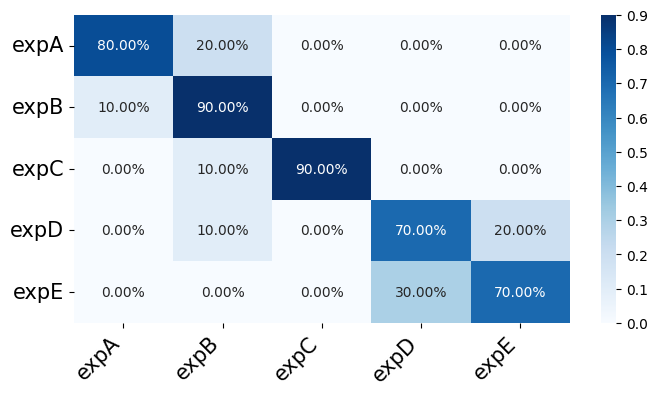

In [51]:
import pandas as pd
plt.figure(figsize=(8,4))

class_names = list(class_directories)
confusion_matrix = confusion_matrix / confusion_matrix.sum(axis=1, keepdims=True)
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(float)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.2%',  cmap='Blues')

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.show()